# Convolutional Neural Networks: Getting Started

## the only problem with this approach is we need same size of image for input for training

Let's do an image classification problem, with a data set of 32x32 color images that are categorized into one of ten classifications of what's in them. (32x32 is a very small image! So this isn't easy.)

## Steps in this case for CNN
- Input image
- single conv2D layer
- dropout layer
- flattened layer
- dropout layer
- fully connected output layer

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
   
# made a function for ease only    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

## dataset is cifar10 - it has 50K training and 10K test images of 32 x 32 color

### multiple categories means one hot encoding 

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("How's train data - ",x_train.shape)
print("train data size - ",x_train.shape[0])
print("test data size - ",x_test.shape[0])

print("How's the output - ",y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("Encoded output - ",y_test[0])

How's train data -  (50000, 32, 32, 3)
train data size -  50000
test data size -  10000
How's the output -  [3]
Encoded output -  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### print some sample data

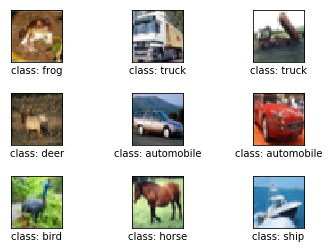

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])


## Normalize the pixel data

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## create model

In [5]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 16,783,754
Trainable params: 16,783,754
Non-trainable params: 0
________________________________________________________________

Now let's actually train our neural network. In the interests of time, we'll just run 10 epochs because we haven't taken steps you'd normally take to make this run faster. But, let's see how long it takes to train this network over 10 epochs:

In [7]:
import time

start_time = time.time()

%time model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 281s 6ms/step - loss: 1.7345 - acc: 0.3793 - val_loss: 1.4422 - val_acc: 0.4970
Epoch 2/10
50000/50000 [==============================] - 276s 6ms/step - loss: 1.4331 - acc: 0.4934 - val_loss: 1.3191 - val_acc: 0.5377
Epoch 3/10
50000/50000 [==============================] - 278s 6ms/step - loss: 1.3106 - acc: 0.5395 - val_loss: 1.2421 - val_acc: 0.5592
Epoch 4/10
50000/50000 [==============================] - 276s 6ms/step - loss: 1.2310 - acc: 0.5696 - val_loss: 1.2136 - val_acc: 0.5732
Epoch 5/10
50000/50000 [==============================] - 278s 6ms/step - loss: 1.1698 - acc: 0.5921 - val_loss: 1.1923 - val_acc: 0.5776
Epoch 6/10
50000/50000 [==============================] - 278s 6ms/step - loss: 1.1204 - acc: 0.6120 - val_loss: 1.1818 - val_acc: 0.5840
Epoch 7/10
50000/50000 [==============================] - 278s 6ms/step - loss: 1.0763 - acc: 0.6283 - val_loss: 1.1414 - 

Now, let's measure the accuracy of our CNN against our test data:

In [8]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 348us/step
Test loss: 1.1057636425971984
Test accuracy: 0.6167


60%? Not that great. The accuracy was improving pretty quickly with every epoch though, so if we let it run longer we'd probably get much better results. It just takes an annoyingly long amount of time to do that, even when using tensorflow-gpu. But, we'll address that shortly!

To get an intuitive feel of just how good or bad our resulting model is, let's go through the first 100 test images and display the ones it got wrong. Are these errors understandable, or just a model that's embarassingly worse than a human?

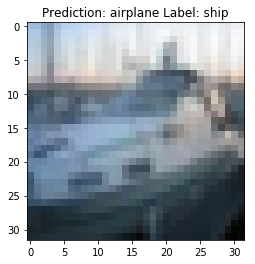

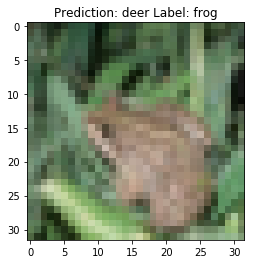

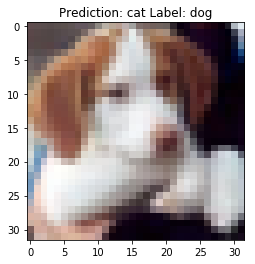

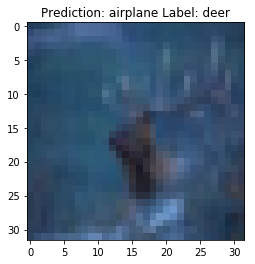

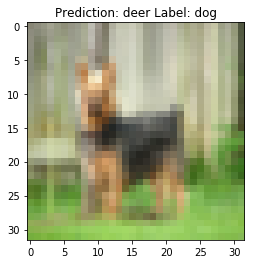

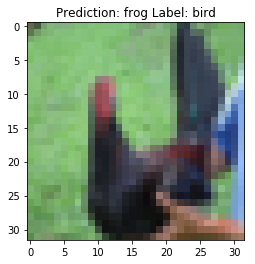

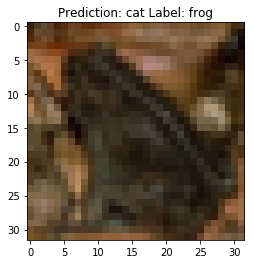

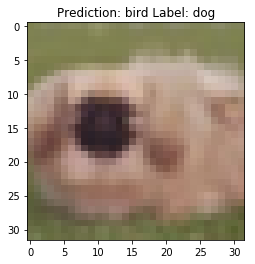

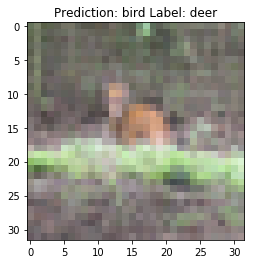

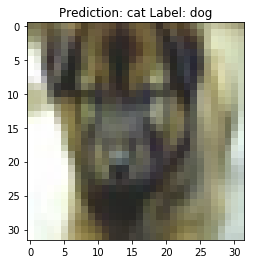

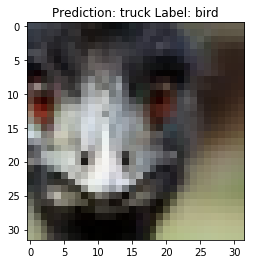

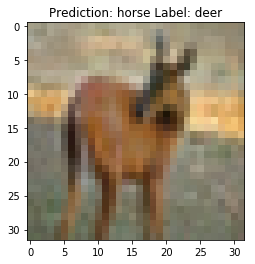

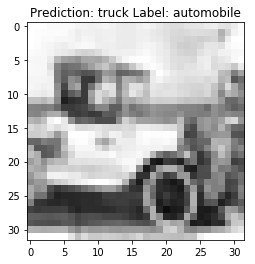

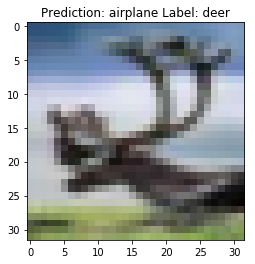

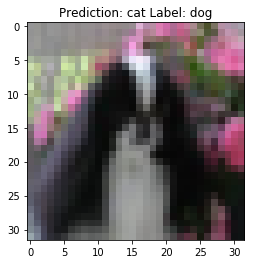

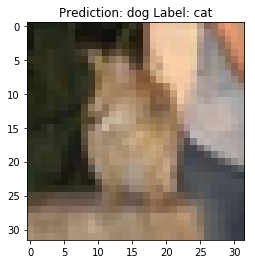

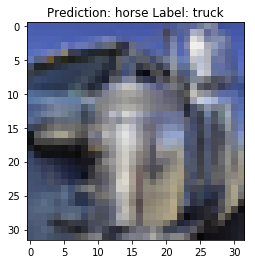

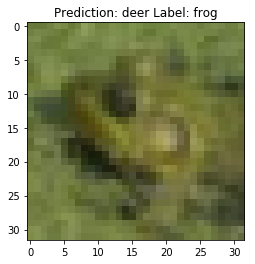

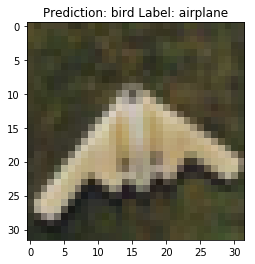

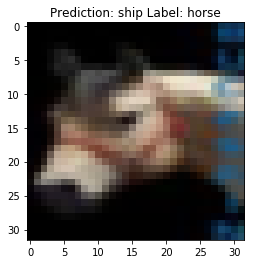

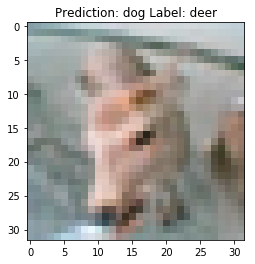

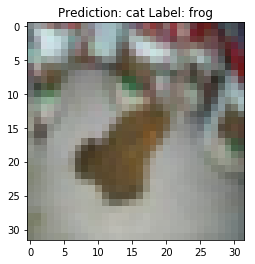

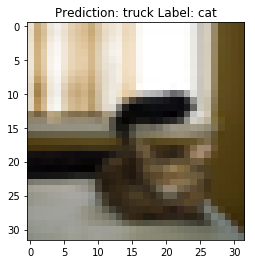

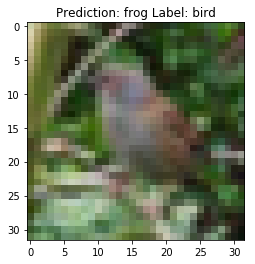

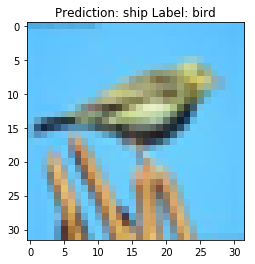

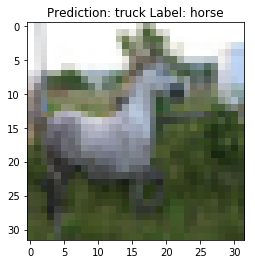

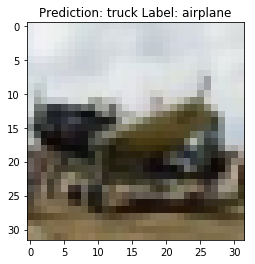

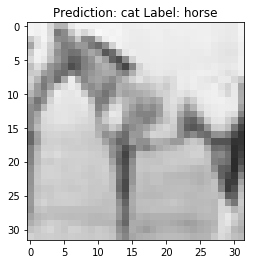

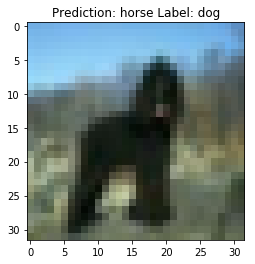

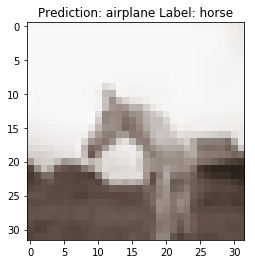

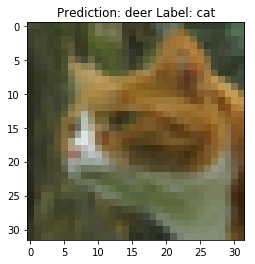

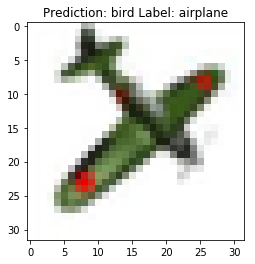

In [9]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()

Yeah, it's pretty bad. But CNN's are actually very powerful - we just haven't tuned it with the right topology, we haven't made it efficient enough to run enough epochs, and there are some other tricks we can use as well. Don't give up on them! We're about to improve on this model substantially.